In [1]:
import projX
import pyemma
import numpy as np
from matplotlib import pylab as plt
from os.path import exists
%matplotlib notebook

In [3]:
trajfile = '/group/ag_cmb/scratch/gph82/work/CMB/hierarchical_TICA/bpti-shaw/DESRES-Trajectory-bpti-c-alpha/c-alpha_centered.stride.100.xtc'
if not exists(trajfile):
    trajfile = trajfile.split('/')[-1]
top  = '/group/ag_cmb/scratch/gph82/work/CMB/hierarchical_TICA/bpti-shaw/DESRES-Trajectory-bpti-c-alpha/bpti-c-alpha_centered.pdb'
if not exists(top):
    top = top.split('/')[-1]

Skip this part if you already have an Y.npy file

In [4]:
if not exists('Y.npy'):
    feat = pyemma.coordinates.featurizer(top)
    pairs = feat.pairs(range(feat.topology.n_atoms)[::2])
    feat.add_distances(pairs)
    src  = pyemma.coordinates.source(trajfile, features=feat)
    tica = pyemma.coordinates.tica(src, lag=10, dim=2)
    Y = tica.get_output()[0]
    np.save('Y.npy', Y)

# Look at the -log(PDF) plot and wonder what structures are behind it

<IPython.core.display.Javascript object>


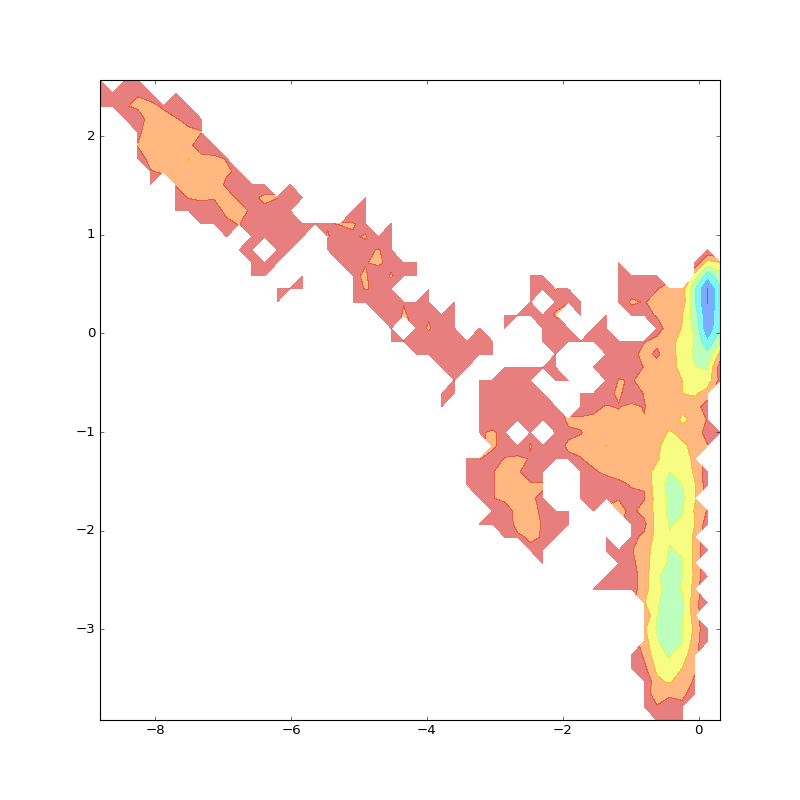

/home/guille/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


In [5]:
Y = np.load('Y.npy')
plt.figure(figsize=(10,10))
h, (x,y) = np.histogramdd(Y, bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)

# Use projX to generate a regspace sample of the data

In [6]:
sample, geoms = projX.generate_sample(trajfile, top, Y, 
                                   #keep_all_samples=True,
                                   #n_geom_samples=100,
                                   #verbose=True
                                    )
sample.shape, geoms

((99, 2),
 <mdtraj.Trajectory with 99 frames, 58 atoms, 58 residues, and unitcells at 0x7febf1fe7048>)

# Link the PDF plot with the sampled structures and visually explore the FES 
Click either on the plot or on the widget slidebar: they're connected! 

<IPython.core.display.Javascript object>


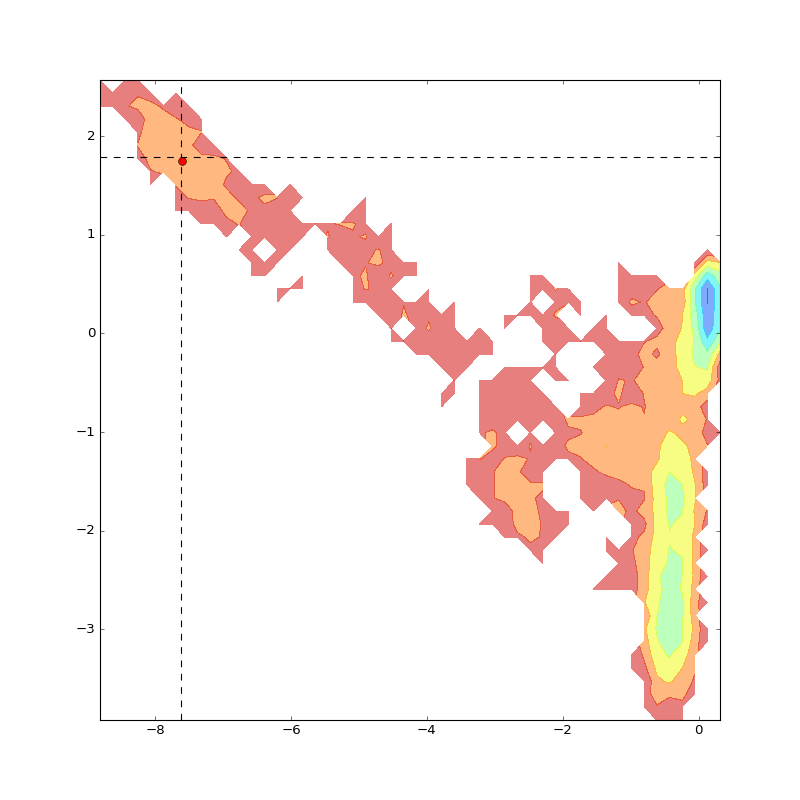

/home/guille/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


In [9]:
# Replot the FES
plt.figure(figsize=(10,10))
h, (x,y) = np.histogramdd(Y, bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)
# Create the linked widget
linked_wdg = projX.visualize_sample(sample, 
                              geoms,                             
                              plt.gca(), 
                              clear_lines=True,
                              #plot_path=True
                            )
# Show it
linked_wdg


# Use projX to generate paths along the different projections/axis

In [10]:
paths_dict, idata = projX.generate_paths(trajfile, top, 
                                         'Y.npy', 
                                         n_projs=2,
                                         verbose=False, 
                                        )

# Link the PDF plot with the sampled paths/structures and visually explore the coordinates separately. 
Click either on the plot or on the widget slidebar: they're connected! You can change the type of path between min_rmsd or min_disp and you can also change the coordinate sampled (0 or 1)


In [11]:
# Choose the coordinate and the tyep of path
coord = 0
path_type = 'min_rmsd'
#path_type = 'min_disp'
igeom = paths_dict[coord][path_type]["geom"]
ipath = paths_dict[coord][path_type]["proj"]

<IPython.core.display.Javascript object>


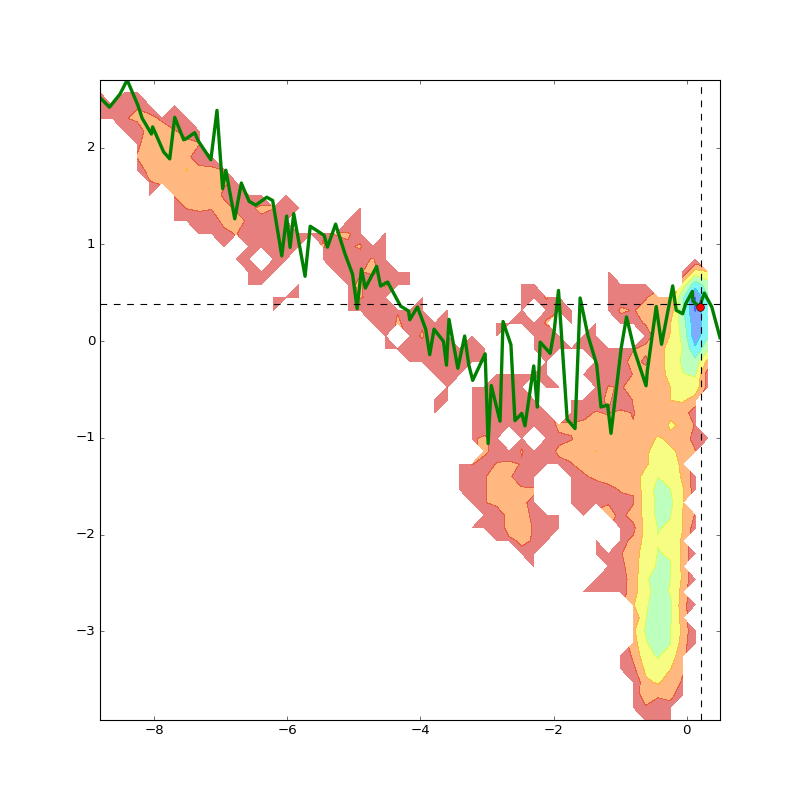

/home/guille/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


caught index error with index 97 (new=97, old=96)


In [13]:
plt.figure(figsize=(10,10))
h, (x,y) = np.histogramdd(Y, bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)

linked_wdg = projX.visualize_sample(ipath, 
                              igeom.superpose(igeom[0]),                             
                              plt.gca(), 
                              clear_lines=True,
                              plot_path=True
                            )
linked_wdg

# You can even provide your own clustering object...

In [14]:
clkmeans = pyemma.coordinates.cluster_kmeans(Y, 10)
sample, geom = projX.generate_sample(trajfile, top, clkmeans, 
                                     n_geom_samples=10, 
                                     keep_all_samples=True # read the doc for this argument
                                    )

15-12-16 11:57:44 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


<IPython.core.display.Javascript object>


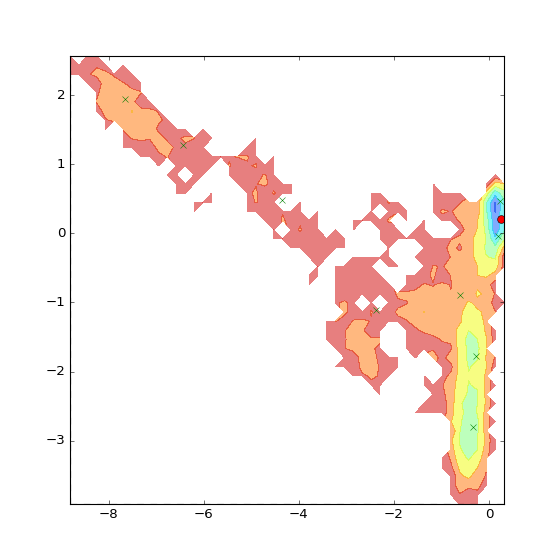

/home/guille/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


caught index error with index 100 (new=100, old=99)
caught index error with index 100 (new=100, old=99)
caught index error with index 100 (new=100, old=99)


In [15]:
plt.figure(figsize=(7,7))
h, (x,y) = np.histogramdd(Y, bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)
plt.plot(clkmeans.clustercenters[:,0], clkmeans.clustercenters[:,1],' xg')
iwdg = projX.visualize_sample(sample, 
                              geom.superpose(geom[0]),                             
                              plt.gca(), 
                              clear_lines=False,
                              #plot_path=True
                            )
iwdg